# Represent the number of properties according to their surface using a histogram

This Python script provides a complete workflow to analyze properties in Belgium using a Pandas DataFrame. The steps included in the code are:

1. Loading the data
2. Cleaning the data
3. Filling missing values
4. Visualizing the data



### Import librarys

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Loading the data
We begin by loading a CSV file using the Pandas library into a DataFrame.


In [2]:
df = pd.read_csv("../data/property_data.csv")

### Cleaning the data
Cleaning the data
Next, we clean the data by removing duplicates and stripping any leading or trailing white spaces from string type columns.

In [3]:
# Remove any duplicate rows from the dataframe
df = df.drop_duplicates()

# Apply a function to each element of the dataframe
# The function removes any leading or trailing spaces from strings
# If the element is not a string, it returns it as it is
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### Filling missing values
Then we fill in the missing values in the DataFrame. For numerical columns, we use 0, and for object type columns, we use 'unknown'.

In [4]:
# Select the columns of the dataframe that have float64 data type
# Replace any missing values with 0
df.loc[:, df.dtypes == np.float64] = df.loc[:, df.dtypes == np.float64].fillna(0)

# Select the columns of the dataframe that have int64 data type
# Replace any missing values with 0
df.loc[:, df.dtypes == np.int64] = df.loc[:, df.dtypes == np.int64].fillna(0)

# Select the columns of the dataframe that have object data type
# Replace any missing values with 'unknown'
df.loc[:, df.dtypes == object] = df.loc[:, df.dtypes == object].fillna('unknown')


### Visualizing the data
Finally, we visualize the distribution of the surface area of properties using a histogram after removing outliers. The outliers are identified and removed using the Inter Quartile Range (IQR) method.


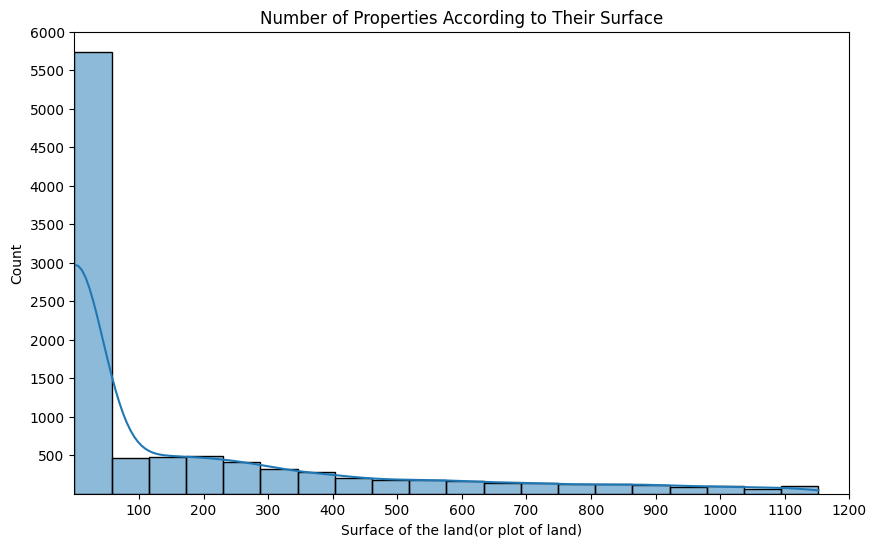

In [5]:
# Drop any rows that have missing values in the 'Surface of the land(or plot of land)' column
df = df.dropna(subset=['Surface of the land(or plot of land)'])

# Calculate the first quartile (25th percentile) of the 'Surface of the land(or plot of land)' column
Q1 = df['Surface of the land(or plot of land)'].quantile(0.25)

# Calculate the third quartile (75th percentile) of the 'Surface of the land(or plot of land)' column
Q3 = df['Surface of the land(or plot of land)'].quantile(0.75)

# Calculate the interquartile range (IQR), which is the difference between Q3 and Q1
IQR = Q3 - Q1

# Calculate the lower bound, which is Q1 minus 1.5 times IQR
lower_bound = Q1 - 1.5 * IQR

# Calculate the upper bound, which is Q3 plus 1.5 times IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to keep only the rows that have 'Surface of the land(or plot of land)' values between the lower and upper bounds
df = df[(df['Surface of the land(or plot of land)'] >= lower_bound) & 
        (df['Surface of the land(or plot of land)'] <= upper_bound)]

# Create a figure with a specified size
plt.figure(figsize=(10,6))

# Create a histogram of the 'Surface of the land(or plot of land)' column, with 20 bins and a kernel density estimate (kde)
sns.histplot(df['Surface of the land(or plot of land)'], bins=20, kde=True)

# Set the x-axis limit to 1,300
plt.xlim(0, 1200)

# Set the y-axis limit to 7,000
plt.ylim(0, 6000)

#assign range of x and y for better looking
yticks = np.arange(500, 6500, 500)
xticks = np.arange(100,1250,100)

plt.yticks(yticks)
plt.xticks(xticks)


# Add a title to the plot
plt.title('Number of Properties According to Their Surface')

# Show the plot
plt.show()
